In [76]:
print('Linear Regresion with singlr variable')

Linear Regresion with singlr variable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv('C:/Users/Dell/Desktop/1/Machine Learning/price.csv')

In [4]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [5]:
%matplotlib inline

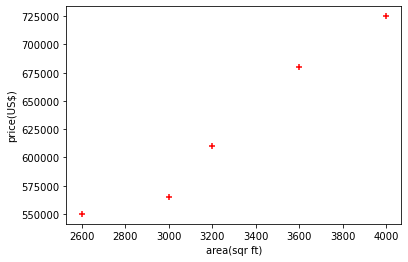

In [6]:
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [31]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [61]:
reg.predict(3300)

ValueError: Expected 2D array, got scalar array instead:
array=3300.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [41]:
m = reg.coef_
m

array([135.78767123])

In [44]:
b= reg.intercept_
b

180616.43835616432

In [45]:
x=3300
y=m*x+b
135.78767123*3300+180616.43835616432

628715.7534151643

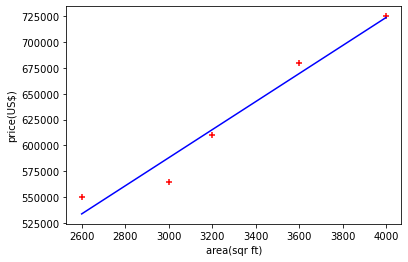

In [65]:
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [47]:
d = pd.read_csv('C:/Users/Dell/Desktop/1/Machine Learning/areas.csv')
d

,area
0,1000
1,1500
2,2300
3,2350
4,3000
5,2500
6,2600
7,2700
8,3200


In [50]:
p = reg.predict(d)

In [53]:
d['prices'] = p  #this will create price column in our data and assign value p to them according their area

In [54]:
d

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,2350,499717.465753
4,3000,587979.452055
5,2500,520085.616438
6,2600,533664.383562
7,2700,547243.150685
8,3200,615136.986301


In [74]:
d.to_csv('prdiction.csv',index=False)

In [77]:
print('Linear Regresion with multiple variable')

Linear Regresion with multiple variable


In [78]:
from sklearn import linear_model

In [81]:
df = pd.read_csv('C:/Users/Dell/Desktop/1/Machine Learning/1.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,680000
4,4000,5.0,8,725000


In [118]:
import math
df_bed = math.floor(df.bedrooms.mean())
df_bed

3

In [119]:
df.bedrooms = df.bedrooms.fillna(df_bed)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.5,18,610000
3,3600,3.0,30,680000
4,4000,5.0,8,725000


In [111]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [112]:
reg.coef_

array([   180.19345472, -60375.92214723,  -4060.587035  ])

In [113]:
reg.intercept_

332259.06451106555

In [116]:
reg.predict([[3000,3,40]])

array([529288.18081934])

In [117]:
180.19345472*3000 + -60375.92214723*3 + -4060.587035*40 + 332259.06451106555

529288.1808293755

In [1]:
import pandas as pd
import numpy as np


In [2]:
print('dummy variabes and one hot encoding')

dummy variabes and one hot encoding


In [3]:
df = pd.read_csv('C:/Users/Dell/Desktop/1/Machine Learning/house.csv')
df

,town,area,price
0,bvn,2500,550000
1,bvn,2600,560000
2,bvn,3000,580000
3,bvn,3200,590000
4,bvn,3600,620000
5,bvn,4000,650000
6,rjk,2600,570000
7,rjk,2800,580000
8,rjk,3300,590000
9,rjk,3600,600000


In [5]:
dummies = pd.get_dummies(df.town)
dummies


,bvn,gnagar,rjk
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [8]:
merged = pd.concat([df,dummies],axis='columns')
merged

,town,area,price,bvn,gnagar,rjk
0,bvn,2500,550000,1,0,0
1,bvn,2600,560000,1,0,0
2,bvn,3000,580000,1,0,0
3,bvn,3200,590000,1,0,0
4,bvn,3600,620000,1,0,0
5,bvn,4000,650000,1,0,0
6,rjk,2600,570000,0,0,1
7,rjk,2800,580000,0,0,1
8,rjk,3300,590000,0,0,1
9,rjk,3600,600000,0,0,1


In [9]:
final = merged.drop(['town','bvn'],axis='columns')
final

,area,price,gnagar,rjk
0,2500,550000,0,0
1,2600,560000,0,0
2,3000,580000,0,0
3,3200,590000,0,0
4,3600,620000,0,0
5,4000,650000,0,0
6,2600,570000,0,1
7,2800,580000,0,1
8,3300,590000,0,1
9,3600,600000,0,1


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
X = final.drop('price' , axis = 'columns')
X

,area,gnagar,rjk
0,2500,0,0
1,2600,0,0
2,3000,0,0
3,3200,0,0
4,3600,0,0
5,4000,0,0
6,2600,0,1
7,2800,0,1
8,3300,0,1
9,3600,0,1


In [15]:
y = final.price
y

0     550000
1     560000
2     580000
3     590000
4     620000
5     650000
6     570000
7     580000
8     590000
9     600000
10    570000
11    640000
12    560000
13    580000
Name: price, dtype: int64

In [16]:
model.fit(X,y)

LinearRegression()

In [17]:
model.predict([[2800,0,1]])  #(area,gnagar,rjk)

array([568909.3924943])

In [18]:
model.predict([[3400,0,0]])

array([606294.49167185])

In [19]:
model.score(X,y)

0.9016195117872269

In [20]:
print('one hot encode')

one hot encode


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2500,550000
1,0,2600,560000
2,0,3000,580000
3,0,3200,590000
4,0,3600,620000
5,0,4000,650000
6,2,2600,570000
7,2,2800,580000
8,2,3300,590000
9,2,3600,600000


In [25]:
X = dfle[['town','area']].values
X

array([[   0, 2500],
       [   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2300],
       [   1, 3400],
       [   1, 2500],
       [   1, 2550]], dtype=int64)

In [26]:
y = dfle.price
y

0     550000
1     560000
2     580000
3     590000
4     620000
5     650000
6     570000
7     580000
8     590000
9     600000
10    570000
11    640000
12    560000
13    580000
Name: price, dtype: int64

In [45]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [46]:
X = ohe.fit_transform(X).toarray()
X

array([[0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
        1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 

In [47]:

X = X[:,1:] 
X

array([[1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
        1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
        1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.],
       [1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
        0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
        1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.],
       [1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
        1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
        1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.],
       [1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
        1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
        1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.],
       [1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
        1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
    

In [48]:
model.fit(X,y)

LinearRegression()

In [49]:
model.predict([[1,0,2800]])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 47 is different from 3)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print("Training and Testing the data")

Training and Testing the data


In [17]:
df = pd.read_csv('C:/Users/Dell/Desktop/1/Machine Learning/car.csv')
df

,mileage,age(yrs),sell price($)
0,69000,8,18000
1,67000,9,20000
2,78000,7,23000
3,56000,6,18000
4,54000,4,12000
5,43000,5,13000
6,34500,9,11000
7,58000,8,14000
8,44000,7,10000
9,56700,6,14000


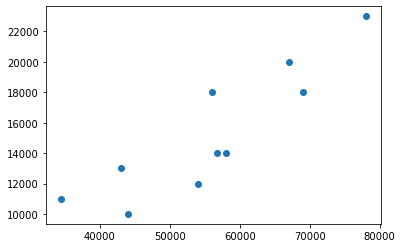

In [19]:
plt.scatter(df['mileage'],df['sell price($)'])

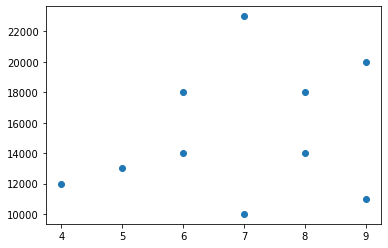

In [20]:
plt.scatter(df['age(yrs)'],df['sell price($)'])

In [21]:
X = df[['mileage','age(yrs)']]
y = df['sell price($)']

In [22]:
X


,mileage,age(yrs)
0,69000,8
1,67000,9
2,78000,7
3,56000,6
4,54000,4
5,43000,5
6,34500,9
7,58000,8
8,44000,7
9,56700,6


In [23]:
y

0    18000
1    20000
2    23000
3    18000
4    12000
5    13000
6    11000
7    14000
8    10000
9    14000
Name: sell price($), dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)#if we gib=verandom_state=10 parameter then X_train value is not change everytime

In [27]:
len(X_train)

8

In [28]:
len(X_test)

2

In [35]:
X_train

,mileage,age(yrs)
5,43000,5
6,34500,9
3,56000,6
1,67000,9
0,69000,8
7,58000,8
4,54000,4
9,56700,6


In [36]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [37]:
clf.fit(X_train,y_train)

LinearRegression()

In [38]:
clf.predict(X_test)

array([12702.54154643, 20106.77707511])

In [39]:
y_test

8    10000
2    23000
Name: sell price($), dtype: int64

In [40]:
clf.score(X_test,y_test)

0.8145033171209493

In [45]:
print("LogisticRegression")  #used to solve classification pbs

LogisticRegression


In [46]:
df = pd.read_csv('C:/Users/Dell/Desktop/1/Machine Learning/insurance.csv')
df

,age,bought_insurance
0,22,0
1,18,1
2,17,0
3,45,1
4,66,1
5,44,1
6,20,0
7,19,0
8,52,0
9,55,1


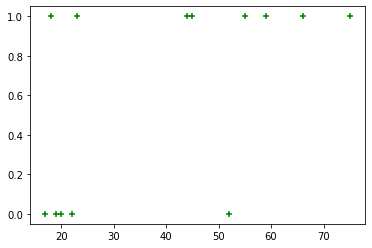

In [47]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='green')

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

In [51]:
X_test

,age
0,22
4,66


In [52]:
X_train

,age
3,45
12,23
9,55
1,18
5,44
8,52
6,20
2,17
10,75
7,19


In [53]:
from sklearn.linear_model import LogisticRegression


In [55]:
model = LogisticRegression()

In [56]:
model.fit(X_train,y_train)

LogisticRegression()

In [57]:
model.predict(X_test)

array([0, 1], dtype=int64)

In [58]:
y_test

0    0
4    1
Name: bought_insurance, dtype: int64

In [59]:
model.score(X_test,y_test)

1.0

In [63]:
model.predict_log_proba(X_test)  #probability of buying insurance (not buying,buying)

array([[-0.57094661, -0.83238709],
       [-2.507027  , -0.08502449]])

In [64]:
model.predict_proba(X_test)

array([[0.56499036, 0.43500964],
       [0.08151021, 0.91848979]])

In [67]:
model.predict([[44]])

array([1], dtype=int64)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.datasets import load_digits  #(.datasets have many pre-defined datasets, here we use load_digits)

In [8]:
digits = load_digits() #loading training set

In [10]:
dir(digits)  #what training set contain

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [11]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

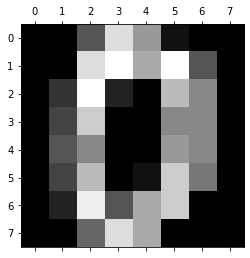

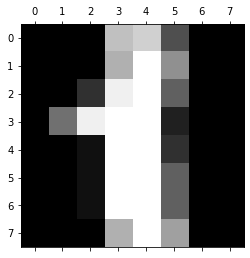

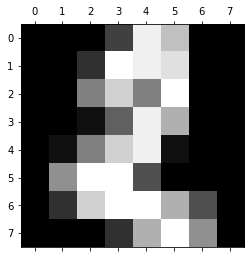

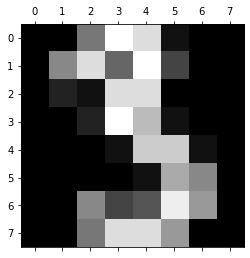

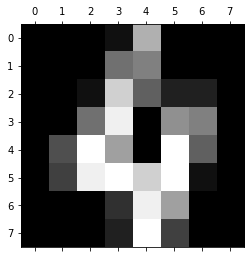

In [21]:
plt.gray()
for i in range(5):    #for 1st 5 data
    plt.matshow(digits.images[i])

In [20]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [23]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [26]:
X_train

array([[ 0.,  0., 14., ...,  5.,  0.,  0.],
       [ 0.,  0., 10., ...,  2.,  0.,  0.],
       [ 0.,  1., 14., ..., 16., 15.,  5.],
       ...,
       [ 0.,  0.,  4., ..., 15.,  4.,  0.],
       [ 0.,  2., 13., ..., 12., 12.,  1.],
       [ 0.,  0., 10., ..., 14.,  2.,  0.]])

In [28]:
len(X_train)

1437

In [29]:
len(X_test)

360

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
model.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
model.score(X_test,y_test)

0.9694444444444444

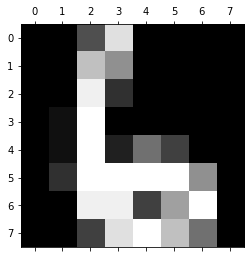

In [35]:
plt.matshow(digits.images[67])

In [36]:
digits.target[67]

6

In [37]:
model.predict([digits.data[67]])

array([6])

In [39]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [41]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test,y_predicted)  #(truth , what your model predicted)
cn

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 27,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  1,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 37]], dtype=int64)

Text(69.0, 0.5, 'Truth')

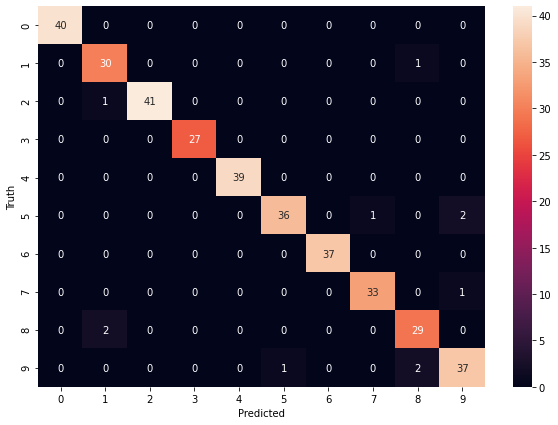

In [42]:
import seaborn as sn 
plt.figure(figsize = (10,7))
sn.heatmap(cn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv('C:/Users/Dell/Desktop/1/Machine Learning/salary.csv')
df.head()

,company,job,degree,salary_more_than_100k
0,google,s.e,b,0
1,google,c.p,m,1
2,google,s.e,b,0
3,google,c.p,m,1
4,google,b.m,m,1


In [45]:
inputs = df.drop('salary_more_than_100k',axis='columns')
target = df['salary_more_than_100k']

In [46]:
inputs

,company,job,degree
0,google,s.e,b
1,google,c.p,m
2,google,s.e,b
3,google,c.p,m
4,google,b.m,m
5,google,s.e,b
6,fb,c.p,b
7,fb,c.p,m
8,fb,b.m,b
9,fb,s.e,m


In [47]:
target

0     0
1     1
2     0
3     1
4     1
5     0
6     1
7     1
8     1
9     1
10    1
11    0
12    0
13    1
14    1
Name: salary_more_than_100k, dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [62]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,s.e,b,2,2,0
1,google,c.p,m,2,1,1
2,google,s.e,b,2,2,0
3,google,c.p,m,2,1,1
4,google,b.m,m,2,0,1


In [63]:
inputs_n = inputs.drop(['company', 'job', 'degree'], axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,1,1
2,2,2,0
3,2,1,1
4,2,0,1
5,2,2,0
6,1,1,0
7,1,1,1
8,1,0,0
9,1,2,1


In [64]:
from sklearn import tree

In [65]:
model = tree.DecisionTreeClassifier()

In [66]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [67]:
model.score(inputs_n,target)

1.0

In [70]:
model.predict([[2,2,0]])

array([0], dtype=int64)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
print('support vector machine')

support vector machine


In [14]:
from sklearn.datasets import load_iris
iris = load_iris()

In [15]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [21]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [22]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [25]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [36]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


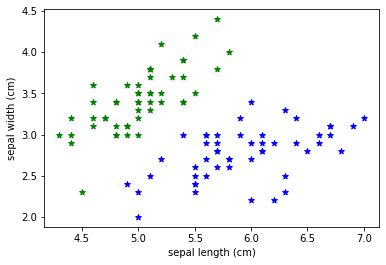

In [41]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green',marker='*')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue',marker='*')

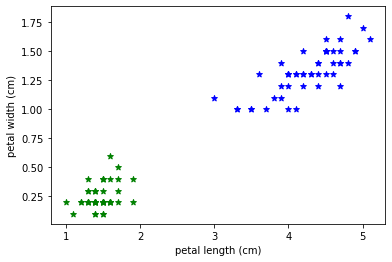

In [42]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green',marker='*')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue',marker='*')

In [44]:
from sklearn.model_selection import train_test_split 

In [45]:
X =df.drop(['target','flower_name'],axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [51]:
len(X_train)

120

In [52]:
len(X_test)

30

In [58]:
from sklearn.svm import SVC
model = SVC(C=10)

In [59]:
model.fit(X_train,y_train)

SVC(C=10)

In [60]:
model.score(X_test,y_test)

0.9666666666666667

In [1]:
print('Random Forest')

Random Forest


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

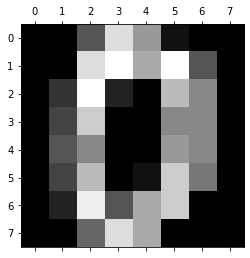

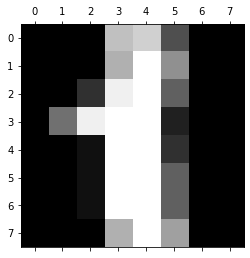

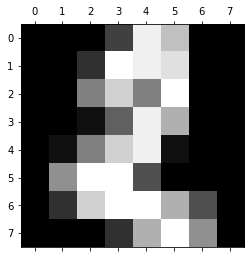

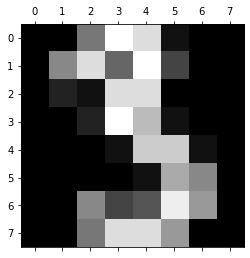

In [7]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [8]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [10]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [11]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [12]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(['target'],axis='columns'),df.target,test_size=0.2)

In [25]:
len(X_train)

1437

In [17]:
len(X_test)

360

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

In [27]:
model.score(X_test,y_test)

0.9666666666666667

In [28]:
print('K Fold Cross Validation')

K Fold Cross Validation


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [46]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9722222222222222

In [47]:
svm = SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9907407407407407

In [48]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.987037037037037

In [51]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)  #create 3 folds
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [52]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [74]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [82]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [100]:
scores_l = []
scores_svm = []
scores_rf = []

for train_index, test_index in kf.split(digits.data):
    X_train,X_test,y_train,y_test = digits.data[train_index], digits.data[test_index], \
                                    digits.target[train_index], digits.target[test_index]
    scores_l.append(get_score(LogisticRegression(),X_train,X_test,y_train,y_test))
    scores_svm.append(get_score(SVC(),X_train,X_test,y_train,y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40),X_train,X_test,y_train,y_test))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [101]:
scores_l

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]

In [102]:
scores_svm

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [103]:
scores_rf

[0.9282136894824707, 0.9415692821368948, 0.9198664440734557]

In [104]:
from sklearn.model_selection import cross_val_score

In [105]:
cross_val_score(LogisticRegression(),digits.data,digits.target) #this cell is same as cell 100(just explanation in 100th cell)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [106]:
cross_val_score(SVC(),digits.data,digits.target)  #(model, X, y)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [108]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data,digits.target)

array([0.93611111, 0.9       , 0.95264624, 0.96935933, 0.91086351])